# Remote Temperature Monitoring Analysis

The objective of this analysis is to *gather insights as to how temperature varies over time*.

The ideal temperature range should be 27-30 degrees, as anything >30 degrees affects the electrical components.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
%matplotlib inline

In [ ]:
# Loading the dataset
remote_temperature_df = pd.read_excel('remote_temperature_monitoring.xlsx')

In [ ]:
remote_temperature_df.head()

,Date & Time,T1,T2,T3,T4
0,"Friday,-November-01-2024-06:08:13",24.9,25.0,24.8,24.8
1,"Friday,-November-01-2024-06:08:28",24.9,24.9,24.8,24.8
2,"Friday,-November-01-2024-06:08:36",24.9,24.9,24.8,24.8
3,"Friday,-November-01-2024-06:08:43",24.8,24.8,24.7,24.7
4,"Friday,-November-01-2024-06:08:51",24.8,24.8,24.7,24.7


# Data Preprocessing

In [ ]:
# Checking for missing values and data types.
remote_temperature_df.isnull().sum()

,0
Date & Time,0
T1,0
T2,0
T3,0
T4,0


In [ ]:
# Checking for the data types
remote_temperature_df.dtypes

,0
Date & Time,object
T1,float64
T2,float64
T3,float64
T4,float64


Extracting the date and time information from the `Date & Time` column

In [ ]:
remote_temperature_df.rename(columns={'Date & Time': 'Datetime'}, inplace=True)

In [ ]:
# Converting `DateTime` column to a datetime object
remote_temperature_df['Datetime'] = pd.to_datetime(remote_temperature_df['Datetime'], format='%A,-%B-%d-%Y-%H:%M:%S')

In [ ]:
remote_temperature_df.head()

,Datetime,T1,T2,T3,T4
0,2024-11-01 06:08:13,24.9,25.0,24.8,24.8
1,2024-11-01 06:08:28,24.9,24.9,24.8,24.8
2,2024-11-01 06:08:36,24.9,24.9,24.8,24.8
3,2024-11-01 06:08:43,24.8,24.8,24.7,24.7
4,2024-11-01 06:08:51,24.8,24.8,24.7,24.7


In [ ]:
# Adjusting the timezones from UTC to Local Time (+3 Hours)
remote_temperature_df['Datetime_Local'] = remote_temperature_df['Datetime'] + pd.Timedelta(hours=3)

In [ ]:
# Extracting the date and time into their own separate columns
remote_temperature_df['date'] = remote_temperature_df['Datetime_Local'].dt.date
remote_temperature_df['time'] = remote_temperature_df['Datetime_Local'].dt.time

In [ ]:
remote_temperature_df.head()

,Datetime,T1,T2,T3,T4,Datetime_Local,date,time
0,2024-11-01 06:08:13,24.9,25.0,24.8,24.8,2024-11-01 09:08:13,2024-11-01,09:08:13
1,2024-11-01 06:08:28,24.9,24.9,24.8,24.8,2024-11-01 09:08:28,2024-11-01,09:08:28
2,2024-11-01 06:08:36,24.9,24.9,24.8,24.8,2024-11-01 09:08:36,2024-11-01,09:08:36
3,2024-11-01 06:08:43,24.8,24.8,24.7,24.7,2024-11-01 09:08:43,2024-11-01,09:08:43
4,2024-11-01 06:08:51,24.8,24.8,24.7,24.7,2024-11-01 09:08:51,2024-11-01,09:08:51


In [ ]:
# Rearranging the columns for readability
cols = ['Datetime', 'Datetime_Local', 'date', 'time', 'T1', 'T2', 'T3', 'T4']
remote_temperature_df = remote_temperature_df[cols]

remote_temperature_df.head()

,Datetime,Datetime_Local,date,time,T1,T2,T3,T4
0,2024-11-01 06:08:13,2024-11-01 09:08:13,2024-11-01,09:08:13,24.9,25.0,24.8,24.8
1,2024-11-01 06:08:28,2024-11-01 09:08:28,2024-11-01,09:08:28,24.9,24.9,24.8,24.8
2,2024-11-01 06:08:36,2024-11-01 09:08:36,2024-11-01,09:08:36,24.9,24.9,24.8,24.8
3,2024-11-01 06:08:43,2024-11-01 09:08:43,2024-11-01,09:08:43,24.8,24.8,24.7,24.7
4,2024-11-01 06:08:51,2024-11-01 09:08:51,2024-11-01,09:08:51,24.8,24.8,24.7,24.7


Next Steps:

* Calculate the average temperatures from the four sensors.

In [ ]:
remote_temperature_df['average_temp'] = remote_temperature_df[['T1', 'T2', 'T3', 'T4']].mean(axis=1)

<ipython-input-14-910bc86d4551>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remote_temperature_df['average_temp'] = remote_temperature_df[['T1', 'T2', 'T3', 'T4']].mean(axis=1)


In [ ]:
remote_temperature_df.head()

,Datetime,Datetime_Local,date,time,T1,T2,T3,T4,average_temp
0,2024-11-01 06:08:13,2024-11-01 09:08:13,2024-11-01,09:08:13,24.9,25.0,24.8,24.8,24.875
1,2024-11-01 06:08:28,2024-11-01 09:08:28,2024-11-01,09:08:28,24.9,24.9,24.8,24.8,24.850
2,2024-11-01 06:08:36,2024-11-01 09:08:36,2024-11-01,09:08:36,24.9,24.9,24.8,24.8,24.850
3,2024-11-01 06:08:43,2024-11-01 09:08:43,2024-11-01,09:08:43,24.8,24.8,24.7,24.7,24.750
4,2024-11-01 06:08:51,2024-11-01 09:08:51,2024-11-01,09:08:51,24.8,24.8,24.7,24.7,24.750


In [ ]:
# To confirm if we have any missing data
remote_temperature_df.isnull().sum()

,0
Datetime,0
Datetime_Local,0
date,0
time,0
T1,0
T2,0
T3,0
T4,0
average_temp,0


# Visualizing the Temperature Trends Over the Course of the Day

## Visualizing temperatures from all the four sensors for consistency

In [ ]:
remote_temperature_df.dtypes

,0
Datetime,datetime64[ns]
Datetime_Local,datetime64[ns]
date,object
time,object
T1,float64
T2,float64
T3,float64
T4,float64
average_temp,float64


In [ ]:
remote_temperature_df.head()

,Datetime,Datetime_Local,date,time,T1,T2,T3,T4,average_temp
0,2024-11-01 06:08:13,2024-11-01 09:08:13,2024-11-01,09:08:13,24.9,25.0,24.8,24.8,24.875
1,2024-11-01 06:08:28,2024-11-01 09:08:28,2024-11-01,09:08:28,24.9,24.9,24.8,24.8,24.850
2,2024-11-01 06:08:36,2024-11-01 09:08:36,2024-11-01,09:08:36,24.9,24.9,24.8,24.8,24.850
3,2024-11-01 06:08:43,2024-11-01 09:08:43,2024-11-01,09:08:43,24.8,24.8,24.7,24.7,24.750
4,2024-11-01 06:08:51,2024-11-01 09:08:51,2024-11-01,09:08:51,24.8,24.8,24.7,24.7,24.750


In [ ]:
# Resampling data to hourly averages
remote_temperature_df.set_index('Datetime_Local', inplace=True)

# Numeric columns for resampling
numeric_cols = ['T1', 'T2', 'T3', 'T4', 'average_temp']

# Resampling to hourly averages
hourly_data = remote_temperature_df[numeric_cols].resample('H').mean().reset_index()

# Reseting the index
remote_temperature_df.reset_index(inplace=True)


<ipython-input-19-f29af0fe80c7>:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = remote_temperature_df[numeric_cols].resample('H').mean().reset_index()


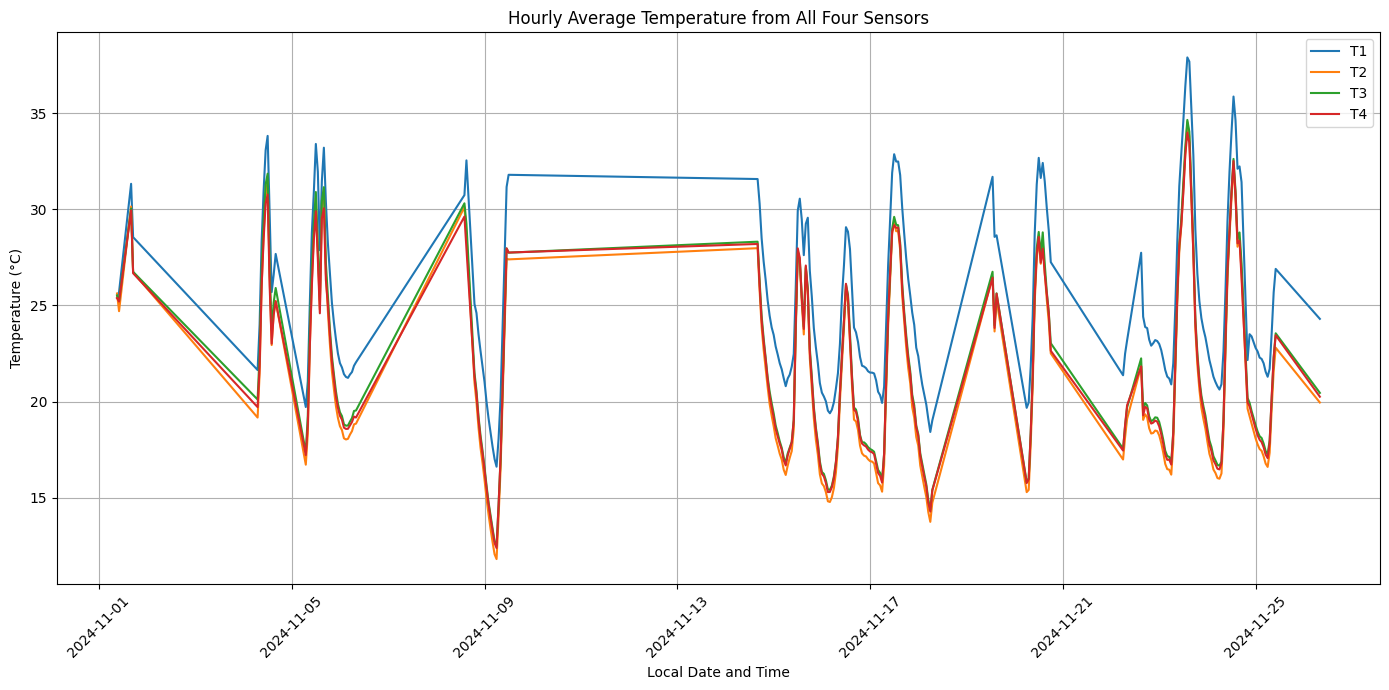

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=hourly_data, x='Datetime_Local', y='T1', label='T1')
sns.lineplot(data=hourly_data, x='Datetime_Local', y='T2', label='T2')
sns.lineplot(data=hourly_data, x='Datetime_Local', y='T3', label='T3')
sns.lineplot(data=hourly_data, x='Datetime_Local', y='T4', label='T4')
plt.title('Hourly Average Temperature from All Four Sensors')
plt.xlabel('Local Date and Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

## Visualizing the average temperatures from the four sensors

### Hourly Average over the time period

In [ ]:
remote_temperature_df.set_index('Datetime_Local', inplace=True)
hourly_average = remote_temperature_df['average_temp'].resample('H').mean().reset_index()

<ipython-input-21-3a41d0aa5adb>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_average = remote_temperature_df['average_temp'].resample('H').mean().reset_index()


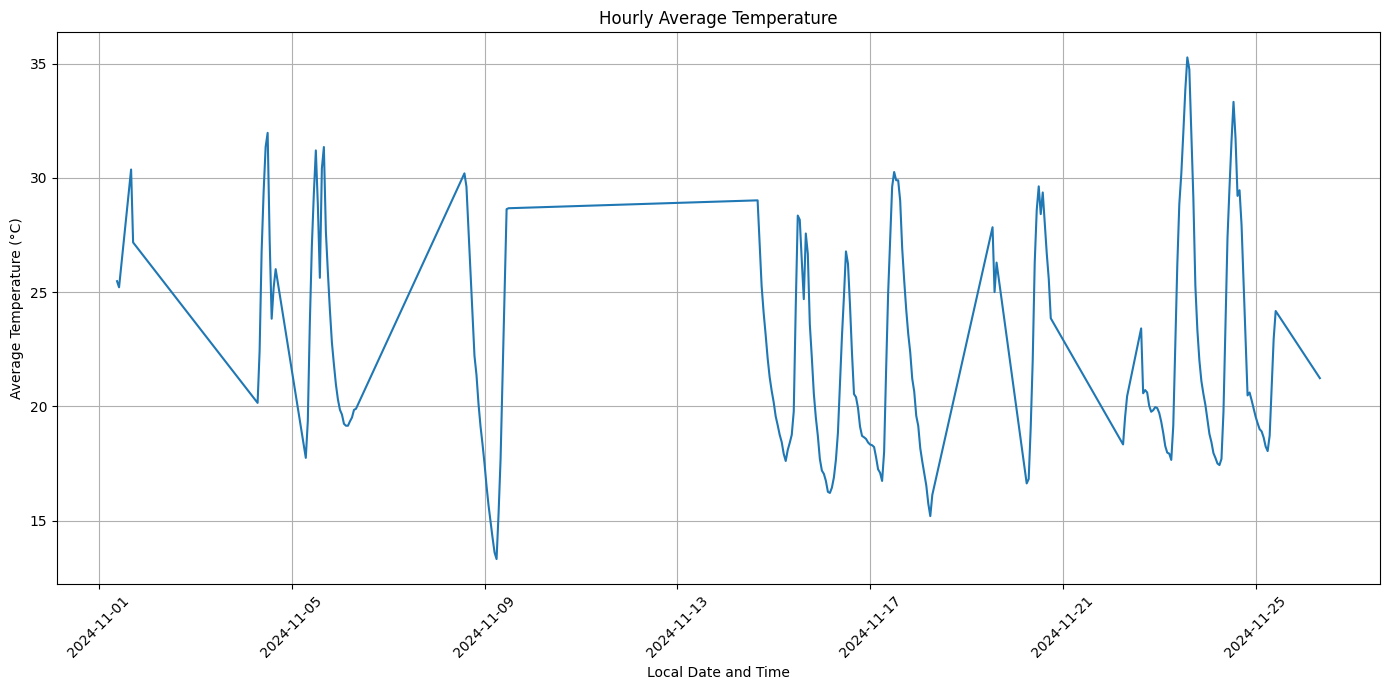

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=hourly_average, x='Datetime_Local', y='average_temp')
plt.title('Hourly Average Temperature')
plt.xlabel('Local Date and Time')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

### Daily Average Temperature Trends

In [ ]:
remote_temperature_df.reset_index(inplace=True)

daily_avg = remote_temperature_df.groupby('date')['average_temp'].mean().reset_index()

daily_avg['date'] = pd.to_datetime(daily_avg['date'])


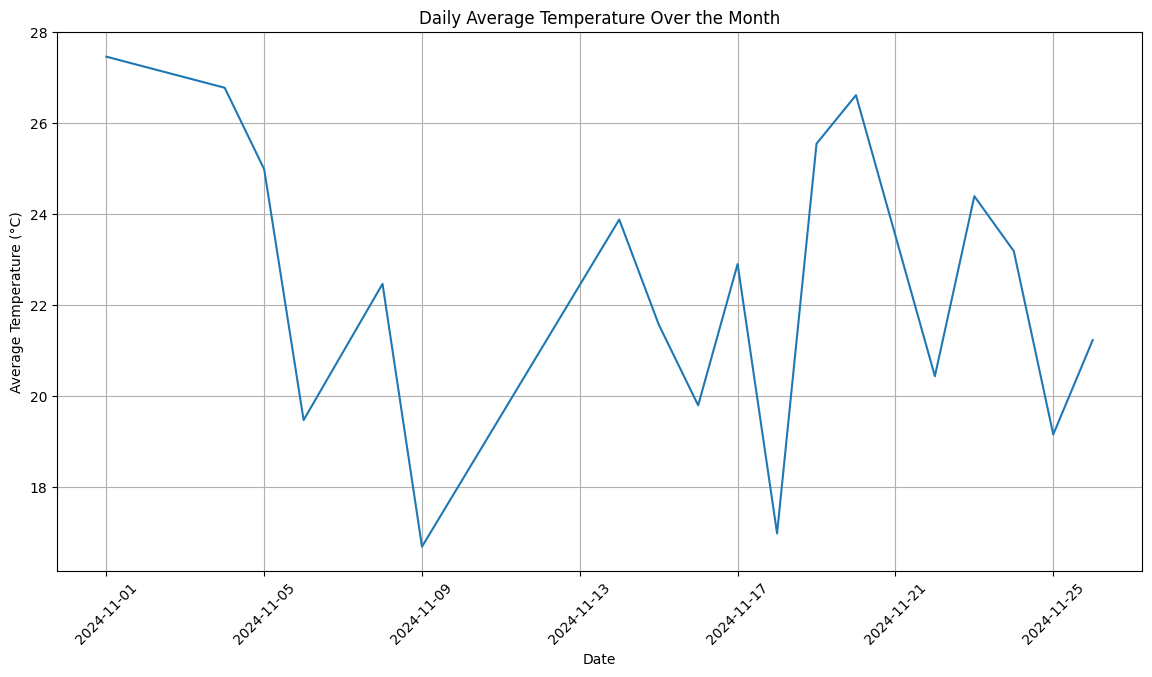

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_avg, x='date', y='average_temp')
plt.title('Daily Average Temperature Over the Month')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Temperature Trends Across The Day

In [ ]:
remote_temperature_df['Hour'] = remote_temperature_df['Datetime_Local'].dt.hour

hourly_avg = remote_temperature_df.groupby('Hour')['average_temp'].mean().reset_index()


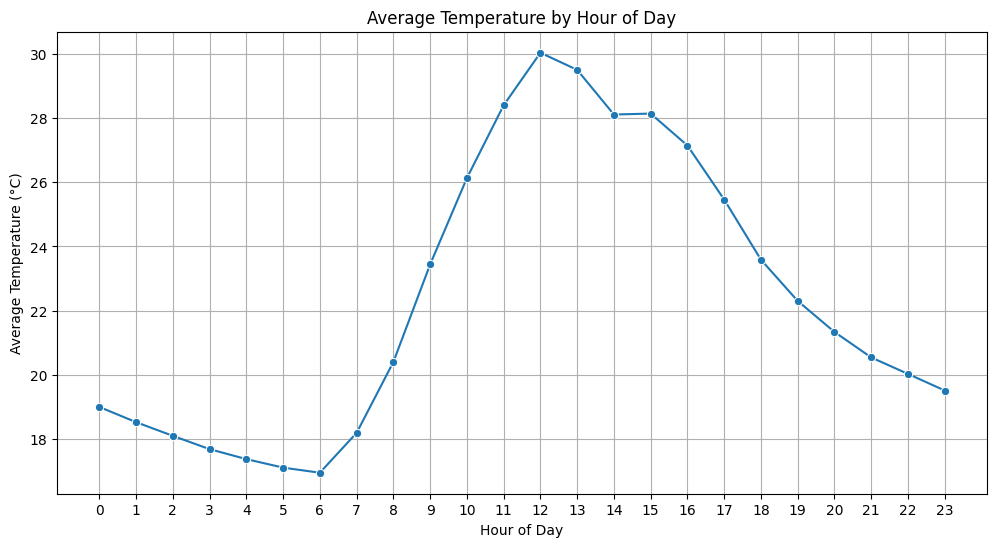

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_avg, x='Hour', y='average_temp', marker='o')
plt.title('Average Temperature by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Temperature (°C)')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

Findings:
* Temperatures seem to peak between 11.00 am and 3.00 pm local time as the averages tend to be >28 degrees celcius. These might be the appropriate times to switch on the fans as the temperature approaches 30 degrees so as to minimize the effects of high temperatures on the fans.


## Examining the Temperatures at 10:00 am and 3:00 pm

For this, we will:

* Filter the data between 10:00 am and 3:00 pm and visualize the daily temperature trends for the specified time period.

* Explore the average temperatures after every 15 minutes

* Compute minimum, maximum, range, and average for the temperatures between the specified time period

In [ ]:
if remote_temperature_df.index.name != 'Datetime_Local':
    remote_temperature_df.set_index('Datetime_Local', inplace=True)

# The start and end times
start_time = '10:00'
end_time = '15:00'

filtered_df = remote_temperature_df.between_time(start_time, end_time)

# Reset index
filtered_df = filtered_df.reset_index()


In [ ]:
filtered_df.head()

,Datetime_Local,Datetime,date,time,T1,T2,T3,T4,average_temp,Hour
0,2024-11-01 10:04:06,2024-11-01 07:04:06,2024-11-01,10:04:06,25.7,24.7,25.2,25.2,25.200,10
1,2024-11-01 10:05:09,2024-11-01 07:05:09,2024-11-01,10:05:09,25.7,24.7,25.3,25.2,25.225,10
2,2024-11-04 10:00:03,2024-11-04 07:00:03,2024-11-04,10:00:03,29.4,27.2,27.9,27.0,27.875,10
3,2024-11-04 10:01:05,2024-11-04 07:01:05,2024-11-04,10:01:05,29.5,27.3,28.0,27.1,27.975,10
4,2024-11-04 10:02:07,2024-11-04 07:02:07,2024-11-04,10:02:07,29.6,27.4,28.1,27.2,28.075,10


In [ ]:
filtered_df['Datetime_Local'] = pd.to_datetime(filtered_df['Datetime_Local'])
filtered_df.set_index('Datetime_Local', inplace=True)

numeric_cols = ['T1', 'T2', 'T3', 'T4', 'average_temp']

resampled_30min = filtered_df[numeric_cols].resample('30min').mean().reset_index()


       Datetime_Local    T1    T2     T3    T4  average_temp
0 2024-11-01 10:00:00  25.7  24.7  25.25  25.2       25.2125
1 2024-11-01 10:30:00   NaN   NaN    NaN   NaN           NaN
2 2024-11-01 11:00:00   NaN   NaN    NaN   NaN           NaN
3 2024-11-01 11:30:00   NaN   NaN    NaN   NaN           NaN
4 2024-11-01 12:00:00   NaN   NaN    NaN   NaN           NaN


In [ ]:
filtered_df.reset_index(inplace=True)

In [ ]:
# Extract the time component for plotting
resampled_30min['Time'] = resampled_30min['Datetime_Local'].dt.time

# Convert 'Time' to a format suitable for plotting (e.g., datetime.time objects)
resampled_30min['Time'] = pd.to_datetime(resampled_30min['Time'].astype(str))

# Group by time and calculate the mean temperature across all days
time_grouped = resampled_30min.groupby(resampled_30min['Datetime_Local'].dt.time)['average_temp'].mean().reset_index()

# Convert 'Time' back to datetime for plotting
time_grouped['Time'] = pd.to_datetime(time_grouped['Datetime_Local'].astype(str))

# Display the grouped data
print(time_grouped.head())


  Datetime_Local  average_temp                Time
0       00:00:00           NaN 2024-11-29 00:00:00
1       00:30:00           NaN 2024-11-29 00:30:00
2       01:00:00           NaN 2024-11-29 01:00:00
3       01:30:00           NaN 2024-11-29 01:30:00
4       02:00:00           NaN 2024-11-29 02:00:00


<ipython-input-53-af34b85042a3>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  resampled_30min['Time'] = pd.to_datetime(resampled_30min['Time'].astype(str))
<ipython-input-53-af34b85042a3>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_grouped['Time'] = pd.to_datetime(time_grouped['Datetime_Local'].astype(str))


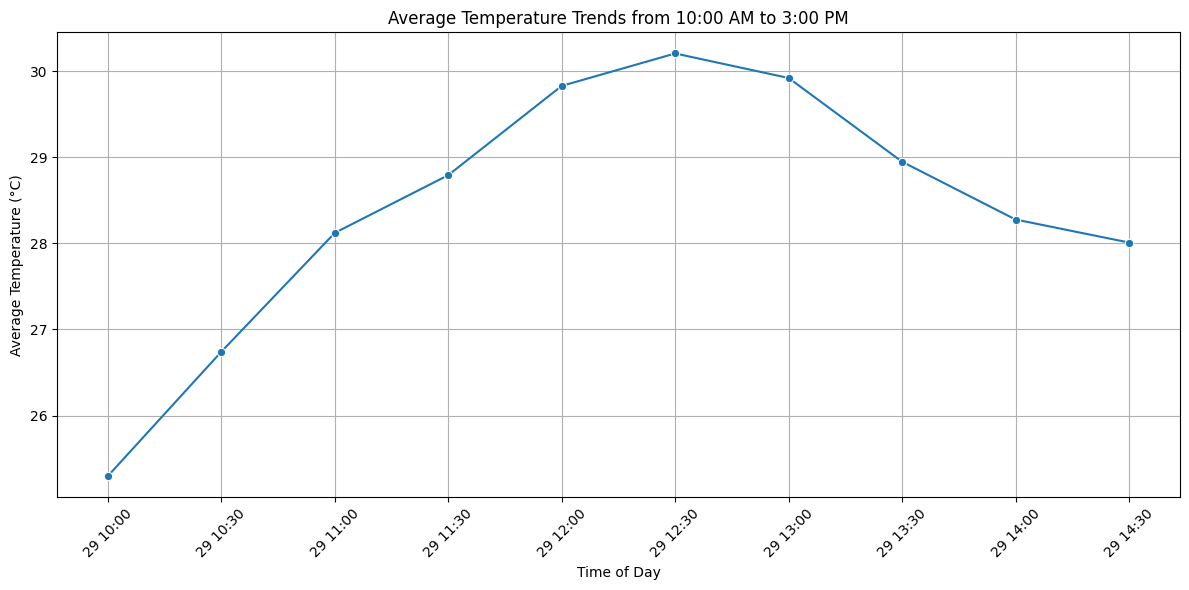

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_grouped, x='Time', y='average_temp', marker='o')
plt.title('Average Temperature Trends from 10:00 AM to 3:00 PM')
plt.xlabel('Time of Day')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
daily_stats = filtered_df.groupby(filtered_df['Datetime_Local'].dt.date).agg(
    Max_Temp=('average_temp', 'max'),
    Min_Temp=('average_temp', 'min')
).reset_index()

daily_stats['Temp_Range'] = daily_stats['Max_Temp'] - daily_stats['Min_Temp']

average_max_temp = daily_stats['Max_Temp'].mean()

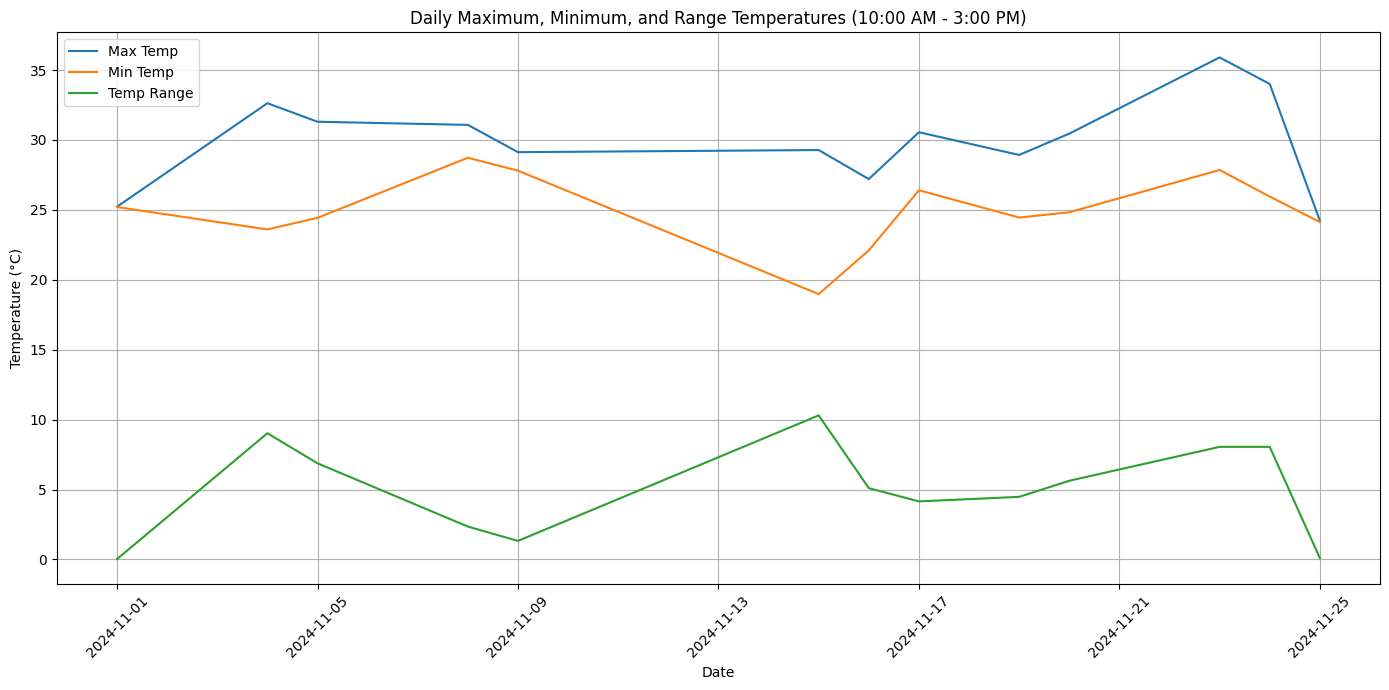

In [ ]:
plt.figure(figsize=(14, 7))

sns.lineplot(data=daily_stats, x='Datetime_Local', y='Max_Temp', label='Max Temp')

sns.lineplot(data=daily_stats, x='Datetime_Local', y='Min_Temp', label='Min Temp')

sns.lineplot(data=daily_stats, x='Datetime_Local', y='Temp_Range', label='Temp Range')

plt.title('Daily Maximum, Minimum, and Range Temperatures (10:00 AM - 3:00 PM)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
display(daily_stats)

,Datetime_Local,Max_Temp,Min_Temp,Temp_Range
0,2024-11-01,25.225,25.200,0.025
1,2024-11-04,32.625,23.600,9.025
2,2024-11-05,31.300,24.425,6.875
3,2024-11-08,31.075,28.725,2.350
4,2024-11-09,29.125,27.800,1.325
5,2024-11-15,29.275,18.975,10.300
6,2024-11-16,27.200,22.100,5.100
7,2024-11-17,30.550,26.400,4.150
8,2024-11-19,28.925,24.450,4.475
9,2024-11-20,30.450,24.825,5.625
